# Plot Solar System Data

This notebook analyzes and plots the data where we have fixed the magma emplacement rate to known solar system values.

*Important*: to generate the data required to run this notebook, run the `generate_SS_data.ipynb` notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import string

In [2]:
solar_df = np.load("sample_solar_filtered.npy",allow_pickle=True)

In [3]:
plt.rcParams['font.family'] = 'Gill Sans'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

col_earth = "#009465"
col_mars = "#cb2f43"
col_io = "#59256a"

## Figure 5

T-1 c median H2O flux:  5.291816082561708
T-1 c median H2O flux:  0.0224819485786267
T-1 c median H2O flux:  14.023652894203112


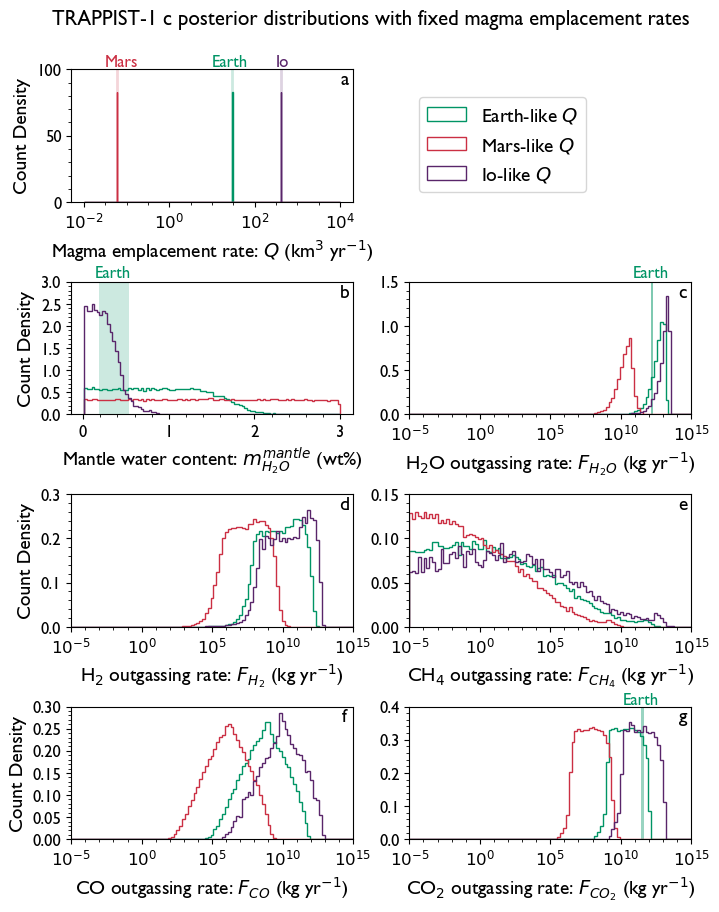

In [4]:
# Create the figure
fig, ax = plt.subplots(4,2)
fig.set_size_inches(8,10)
ax = ax.flatten()

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig.suptitle("TRAPPIST-1 c posterior distributions with fixed magma emplacement rates", fontsize=15, fontweight='bold', y=0.94)
planet_labels = ["Earth-like $Q$","Mars-like $Q$","Io-like $Q$"]
var_names = ["Q","skip","m_H2O_mantle","H2O_flux","H2_flux","CH4_flux","CO_flux","CO2_flux"]
plot_names = ["Magma emplacement rate: $Q$ (km$^3$ yr$^{-1}$)",
              "skip",
              "Mantle water content: $m^{mantle}_{H_2O}$ (wt%)",
              "H$_2$O outgassing rate: $F_{H_2O}$ (kg yr$^{-1}$)",
              "H$_2$ outgassing rate: $F_{H_2}$ (kg yr$^{-1}$)",
              "CH$_4$ outgassing rate: $F_{CH_4}$ (kg yr$^{-1}$)",
              "CO outgassing rate: $F_{CO}$ (kg yr$^{-1}$)",
              "CO$_2$ outgassing rate: $F_{CO_2}$ (kg yr$^{-1}$)"]

lw = 1
al = 1
dent = True
binnum = 100

l_fs = 14
ss_fs = 12

c = [col_earth, col_mars, col_io]

t1c_dfs_filtered = solar_df
for i in range(len(var_names)):
    
    var_name = var_names[i]
    if var_name =="skip":
        continue
    
    plot_name = plot_names[i]
    #ax[i].grid()
    ax[i].minorticks_on()
    ax[i].set_xlabel(plot_name,fontsize = l_fs)
    
    # loop through the planets
    for j in range(3):
        
        df = t1c_dfs_filtered[j]
        var = df[var_name].to_numpy()
        
        col = c[j]
        
        match var_name:
            case "m_H2O_mantle":
                ax[i].hist(var*100,label=planet_labels[j],bins=np.linspace(0.01,3,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                
                if j == 0:
                    x_start = 0.18
                    x_end = 0.54
                    ax[i].axvspan(x_start, x_end, facecolor=col_earth, alpha=0.2, edgecolor='none')
                    ax[i].text(x_start - 0.04, 3.1, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].set_ylim((0,3))
                    ax[i].set_yticks((0,0.5,1,1.5,2,2.5,3))
                
            case "Q":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],
                           bins=np.linspace(np.log10(0.01),np.log10(1e4),500),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)

                
                if j == 0:
                    t_height = 102.5
                    ax[i].text(np.log10(30-20), t_height, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].text(np.log10(0.06 - 0.03), t_height, 'Mars', color=col_mars, fontsize=ss_fs)
                    ax[i].text(np.log10(413 - 110), t_height, 'Io', color=col_io, fontsize=ss_fs)

                    ax[i].axvline(np.log10(30), color=col_earth, linestyle='-',linewidth=2, alpha=0.2)
                    ax[i].axvline(np.log10(0.06), color=col_mars, linestyle='-',linewidth=2, alpha=0.2)
                    ax[i].axvline(np.log10(413), color=col_io, linestyle='-',linewidth=2, alpha=0.2)
                    
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    
                    ax[i].set_ylim((0,100))
                    ax[i].set_yticks((0,50,100))
            
            case "H2O_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                
                print("T-1 c median H2O flux: ",np.median(var)*1e-12)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # H2O fluxes - Catling book
                    x_start = 1.35e12
                    x_end = 2.07e12
                    ax[i].axvspan(np.log10(x_start), np.log10(x_end), facecolor=col_earth, alpha=0.5,edgecolor='none')
                    ax[i].text(np.log10(x_start*0.05), 1.55, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    
                    ax[i].set_ylim((0,1.5))
                    ax[i].set_yticks((0,0.5,1,1.5))
            
            case "H2_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
            
            case "CH4_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # H2O fluxes - Catling book
                    # x_start = 1.35e12
                    # x_end = 2.07e12
                    # ax[i].axvspan(np.log10(x_start), np.log10(x_end), color='g', alpha=0.2)
                    # ax[i].text(np.log10(x_start*0.4), 0.361, 'Earth', color='g', fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    
                    ax[i].set_ylim((0,0.15))
                    ax[i].set_yticks((0,0.05,0.1,0.15))
            
            case "CO_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # H2O fluxes - Catling book
                    # x_start = 1.35e12
                    # x_end = 2.07e12
                    # ax[i].axvspan(np.log10(x_start), np.log10(x_end), color='g', alpha=0.2)
                    # ax[i].text(np.log10(x_start*0.4), 0.361, 'Earth', color='g', fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.05,0.1,0.15,0.2,0.25,0.3))
                    
            case "CO2_flux":
                ax[i].hist(np.log10(var[var > 0].astype(float)),bins=np.linspace(-5,15,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    # CO2 fluxes - Catling book
                    x_start = 6.5e12*44*1e-3
                    x_end = 10.5e12*44*1e-3
                    ax[i].axvspan(np.log10(x_start), np.log10(x_end), facecolor=col_earth, alpha=0.4, edgecolor='none')
                    ax[i].text(np.log10(x_start*0.05), 0.4075, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].set_xlim((-5,15))
                    ax[i].set_xticks((-5,0,5,10,15))
                    ax[i].set_ylim((0,0.4))
                    ax[i].set_yticks((0,0.1,0.2,0.3,0.4))

    #ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax[i].ticklabel_format(axis='y', style='sci', scilimits=(100, 1000))
    

ax[0].set_ylabel("Count Density",fontsize = l_fs)
ax[2].set_ylabel("Count Density",fontsize = l_fs)
ax[4].set_ylabel("Count Density",fontsize = l_fs)
ax[6].set_ylabel("Count Density",fontsize = l_fs)
handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[1].legend(handles, labels, ncol=1, columnspacing=2 , labelspacing=0.5, fontsize=l_fs, loc='lower left')
ax[1].axis("off")

label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    if i == 1:  # Skip the axis that was turned off
        continue
    label = string.ascii_lowercase[label_index]
    axi.text(0.97, 0.92, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=14, fontweight='bold')
    label_index += 1  # Increment only for visible axes


plt.subplots_adjust(hspace=0.6, wspace = 0.2)
plt.show()

## Appendix Figure A2

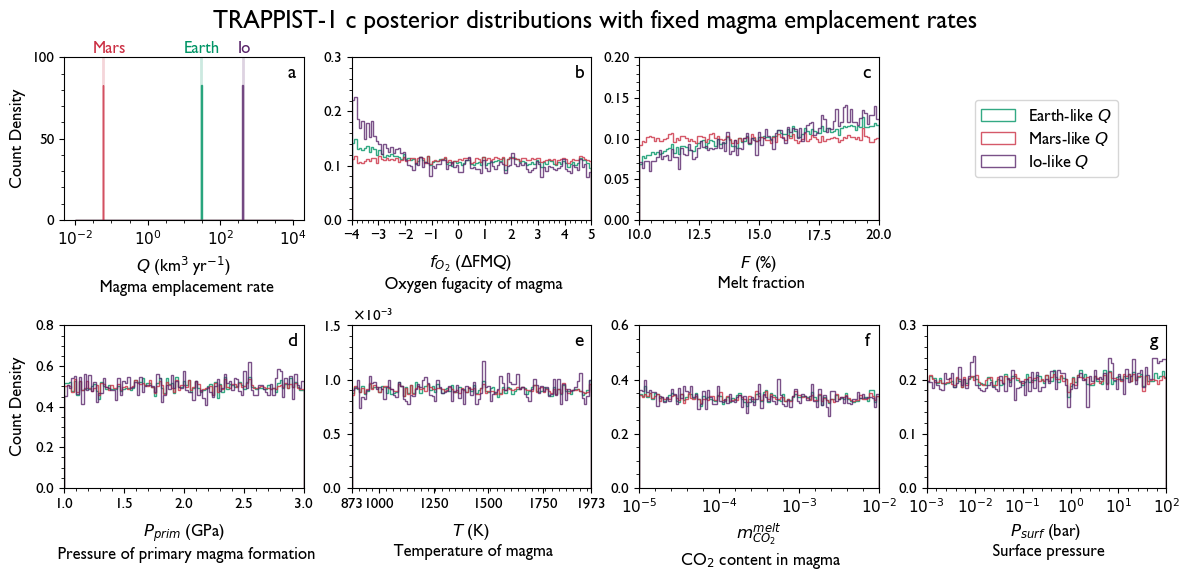

In [5]:
# Create the figure
fig, ax = plt.subplots(2, 4)
fig.set_size_inches(12,6)
ax = ax.flatten()

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

fig.suptitle("TRAPPIST-1 c posterior distributions with fixed magma emplacement rates", fontsize=18, fontweight='bold', y=0.96)
planet_labels = ["Earth-like $Q$","Mars-like $Q$","Io-like $Q$"]
var_names = ["Q","FMQ","F","skip","Pprim","T","x_CO2_melt","Psurf"]
plot_names = ["$Q$ (km$^3$ yr$^{-1}$) \n Magma emplacement rate",
              "$f_{O_2}$ ($\Delta$FMQ) \n Oxygen fugacity of magma",
              "$F$ (%) \n Melt fraction",
              "skip",
              "$P_{prim}$ (GPa) \n Pressure of primary magma formation",
              "$T$ (K) \n Temperature of magma",
              "$m^{melt}_{CO_2}$ \n CO$_2$ content in magma",
              "$P_{surf}$ (bar) \n Surface pressure"]

lw = 1
al = 0.8
dent = True
binnum = 100

l_fs = 12
ss_fs = 12

c = [col_earth, col_mars, col_io]

t1c_dfs_filtered = solar_df

for i in range(len(var_names)):
    
    var_name = var_names[i]
    if var_name =="skip":
        continue
    
    plot_name = plot_names[i]
    #ax[i].grid()
    ax[i].minorticks_on()
    ax[i].set_xlabel(plot_name,fontsize = l_fs)
    
    # loop through the planets
    for j in range(3):
        df = t1c_dfs_filtered[j]
        var = df[var_name].to_numpy()
        
        col = c[j]
        
        match var_name:
            case "F":
                ax[i].hist(var*100,label=planet_labels[j],bins=np.linspace(10,20,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                ax[i].set_xlim((10,20))
                ax[i].set_xticks(np.linspace(10,20,5))
                ax[i].set_ylim((0,0.2))
                ax[i].set_yticks((0,0.05,0.1,0.15,0.2))
            case "Pprim":
                ax[i].hist(var,label=planet_labels[j],bins=np.linspace(1,3,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                ax[i].set_xlim((1,3))
                ax[i].set_xticks(np.linspace(1,3,5))
                ax[i].set_ylim((0,0.8))
                ax[i].set_yticks((0,0.2,0.4,0.6,0.8))
            case "T":
                ax[i].hist(var,label=planet_labels[j],bins=np.linspace(873,1973,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                ax[i].set_xlim((873,1973))
                ax[i].set_xticks((873,1000,1250,1500,1750,1973))
                ax[i].set_ylim((0,0.0015))
                ax[i].set_yticks((0,0.0005,0.001,0.0015))
            case "x_CO2_melt":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],bins=np.linspace(-5,-2,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                ax[i].xaxis.set_major_formatter(formatter)
                ax[i].set_xlim((-5,-2))
                ax[i].set_xticks(np.linspace(-5,-2,4))
                ax[i].set_ylim((0,0.6))
                ax[i].set_yticks((0,0.2,0.4,0.6))
            case "FMQ":
                ax[i].hist(var,label=planet_labels[j],bins=np.linspace(-4,5,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                ax[i].set_xlim((-4,5))
                ax[i].set_xticks(np.linspace(-4,5,10))
                ax[i].set_ylim((0,0.3))
                ax[i].set_yticks((0,0.1,0.2,0.3))
            case "Psurf":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],bins=np.linspace(-3,2,binnum),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)
                formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                ax[i].xaxis.set_major_formatter(formatter)
                ax[i].set_xlim((-3,2))
                ax[i].set_xticks(np.linspace(-3,2,6))
                ax[i].set_ylim((0,0.3))
                ax[i].set_yticks((0,0.1,0.2,0.3))
            case "Q":
                ax[i].hist(np.log10(var.astype(float)),label=planet_labels[j],
                           bins=np.linspace(np.log10(0.01),np.log10(1e4),500),density=dent, alpha = al,histtype='step',linewidth=lw,color=col)

                
                if j == 0:
                    t_height = 102.5
                    ax[i].text(np.log10(30-20), t_height, 'Earth', color=col_earth, fontsize=ss_fs)
                    ax[i].text(np.log10(0.06 - 0.03), t_height, 'Mars', color=col_mars, fontsize=ss_fs)
                    ax[i].text(np.log10(413 - 110), t_height, 'Io', color=col_io, fontsize=ss_fs)

                    ax[i].axvline(np.log10(30), color=col_earth, linestyle='-',linewidth=2, alpha=0.2)
                    ax[i].axvline(np.log10(0.06), color=col_mars, linestyle='-',linewidth=2, alpha=0.2)
                    ax[i].axvline(np.log10(413), color=col_io, linestyle='-',linewidth=2, alpha=0.2)
                    
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    
                    ax[i].set_ylim((0,100))
                    ax[i].set_yticks((0,50,100))


ax[5].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[5].ticklabel_format(axis='y', style='sci', scilimits=(100, 1000))    

ax[0].set_ylabel("Count Density",fontsize = l_fs)
ax[4].set_ylabel("Count Density",fontsize = l_fs)
handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[3].legend(handles, labels, ncol=1, columnspacing=1 , labelspacing=0.3, fontsize=l_fs, loc='center')
ax[3].axis("off")

label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    if i == 3:  # Skip the axis that was turned off
        continue
    label = string.ascii_lowercase[label_index]
    axi.text(0.95, 0.9, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=14, fontweight='bold')
    label_index += 1  # Increment only for visible axes


fig.align_ylabels()
fig.align_xlabels()
plt.tight_layout()
plt.subplots_adjust(hspace=0.65, wspace = 0.2)
plt.show()

# Appendix Figure B2

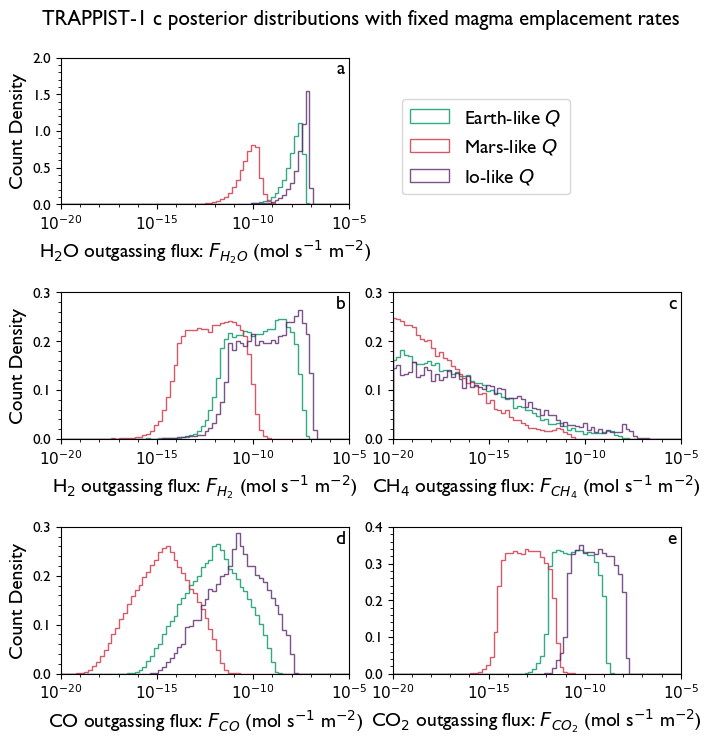

In [6]:
# Create the figure
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(8,8)
ax = ax.flatten()

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

max_Qs = [8500, 5840, 1230, 2159, 2130, 2344, 1230]

# T1 planet values
r_earth = 6371*1e3 # m
rp = np.array([1.116, 1.097, 0.788, 0.920, 1.045, 1.129, 0.755])*r_earth # m

molar_keys = ['H2O','H2','CO2','CO','CH4']
molar_vals = np.array([18.015,2.016,44.01,28.01,16.04]) # g/mol
molar_masses = dict(zip(molar_keys, molar_vals))

cf = 2.53e-6 # conversion factor

fig.suptitle("TRAPPIST-1 c posterior distributions with fixed magma emplacement rates", fontsize=15, fontweight='bold', y=0.94)
planet_labels = ["Earth-like $Q$","Mars-like $Q$","Io-like $Q$"]
var_names = ["H2O_flux","skip","H2_flux","CH4_flux","CO_flux","CO2_flux"]
plot_names = ["H$_2$O outgassing flux: $F_{H_2O}$ (mol s$^{-1}$ m$^{-2}$)",
              "skip",
              "H$_2$ outgassing flux: $F_{H_2}$ (mol s$^{-1}$ m$^{-2}$)",
              "CH$_4$ outgassing flux: $F_{CH_4}$ (mol s$^{-1}$ m$^{-2}$)",
              "CO outgassing flux: $F_{CO}$ (mol s$^{-1}$ m$^{-2}$)",
              "CO$_2$ outgassing flux: $F_{CO_2}$ (mol s$^{-1}$ m$^{-2}$)"]

lw = 1
al = 0.8
dent = True
binnum = 100

l_fs = 14
ss_fs = 12

c = [col_earth, col_mars, col_io]

t1c_dfs_filtered = solar_df
for i in range(len(var_names)):
    
    var_name = var_names[i]
    if var_name =="skip":
        continue
    
    plot_name = plot_names[i]
    #ax[i].grid()
    ax[i].minorticks_on()
    ax[i].set_xlabel(plot_name,fontsize = l_fs)
    
    # loop through the planets
    for j in range(3):
        df = t1c_dfs_filtered[j]
        var = df[var_name].to_numpy()
        r = rp[1]
        
        col = c[j]
        
        match var_name:            
            case "H2O_flux":
                
                var_conv = var*cf*(1/molar_masses["H2O"])*(1/r**2)
                
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color = col)
                
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    
                    ax[i].set_ylim((0,2))
                    ax[i].set_yticks((0,0.5,1,1.5,2))
            
            case "H2_flux":
                
                var_conv = var*cf*(1/molar_masses["H2"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color = col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
            
            case "CH4_flux":
                var_conv = var*cf*(1/molar_masses["CH4"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color = col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
            
            case "CO_flux":
                var_conv = var*cf*(1/molar_masses["CO"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color = col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    ax[i].set_ylim((0,0.3))
                    ax[i].set_yticks((0,0.1,0.2,0.3))
                    
            case "CO2_flux":
                var_conv = var*cf*(1/molar_masses["CO2"])*(1/r**2)
                
                ax[i].hist(np.log10(var_conv[var_conv > 0].astype(float)),bins=np.linspace(-20,0,binnum),label=planet_labels[j],
                           density=dent, alpha = al,histtype='step',linewidth=lw,color = col)
                
                if j == 0:
                    formatter = FuncFormatter(lambda x, _: fr'$10^{{{int(x)}}}$')
                    ax[i].xaxis.set_major_formatter(formatter)
                    ax[i].set_xlim((-20,-5))
                    ax[i].set_xticks((-20,-15,-10,-5))
                    ax[i].set_ylim((0,0.4))
                    ax[i].set_yticks((0,0.1,0.2,0.3,0.4))

    #ax[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #ax[i].ticklabel_format(axis='y', style='sci', scilimits=(100, 1000))
    

ax[0].set_ylabel("Count Density",fontsize = l_fs)
ax[2].set_ylabel("Count Density",fontsize = l_fs)
ax[4].set_ylabel("Count Density",fontsize = l_fs)
handles, labels = ax[0].get_legend_handles_labels()  # Get handles and labels from the first axis
ax[1].legend(handles, labels, ncol=1, columnspacing=2 , labelspacing=0.5, fontsize=l_fs, loc='lower left')
ax[1].axis("off")

label_index = 0  # Initialize label index
for i, axi in enumerate(ax):
    if i == 1:  # Skip the axis that was turned off
        continue
    label = string.ascii_lowercase[label_index]
    axi.text(0.97, 0.92, f"{label}", transform=axi.transAxes, va='center', ha='center', fontsize=14, fontweight='bold')
    label_index += 1  # Increment only for visible axes


plt.subplots_adjust(hspace=0.6, wspace = 0.15)
plt.show()